In [10]:
import tensorflow as tf

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [12]:
# carregando o dataset e normalizando os dados
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f'x_train.shape: {x_train.shape}')

x_train.shape: (60000, 28, 28)


In [13]:
# adicionando a dimensão que falta
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
K = len(set(y_train))
print(f'numero de classes: {K}')

numero de classes: 10


In [15]:
# rede neural pela API funcional

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7397 - loss: 0.7091 - val_accuracy: 0.8445 - val_loss: 0.4108
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8578 - loss: 0.3787 - val_accuracy: 0.8639 - val_loss: 0.3606
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8754 - loss: 0.3263 - val_accuracy: 0.8748 - val_loss: 0.3300
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8883 - loss: 0.2932 - val_accuracy: 0.8880 - val_loss: 0.3055
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8992 - loss: 0.2652 - val_accuracy: 0.8891 - val_loss: 0.3018
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9095 - loss: 0.2403 - val_accuracy: 0.8931 - val_loss: 0.2975
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9156 - loss: 0.2237 - val_accuracy: 0.8979 - val_loss: 0.2938
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9221 - loss: 0.2032 -

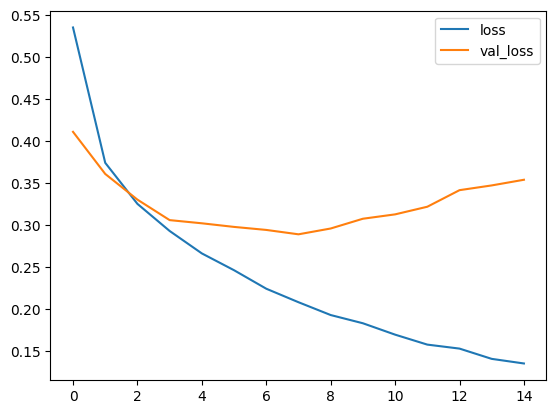

In [18]:
# plotando por loss

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

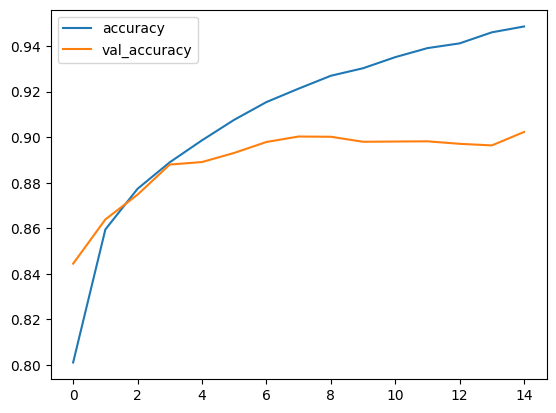

In [19]:
# plotando por precisao
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
conf matrix
[[871   2  16  16   4   2  85   0   4   0]
 [  2 976   0  16   2   0   2   0   2   0]
 [ 27   0 851  13  52   0  56   0   1   0]
 [ 13   6  13 924  25   1  18   0   0   0]
 [  1   1  49  26 862   0  59   0   2   0]
 [  1   0   0   0   0 972   0  17   0  10]
 [121   0  68  25  98   0 678   0  10   0]
 [  0   0   0   0   0  17   0 969   0  14]
 [  8   0   4   3   8   1   3   4 969   0]
 [  1   0   0   0   0   6   0  42   0 951]]


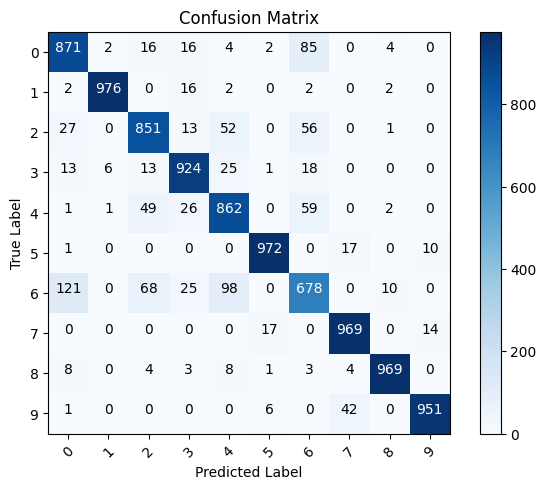

In [23]:
# função para plotar a matriz de confusão com gráfico

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('conf matrix normalizada')
    else:
        print('conf matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

p_teste = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_teste)
plot_confusion_matrix(cm, list(range(10)))